In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [6]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [7]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [8]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

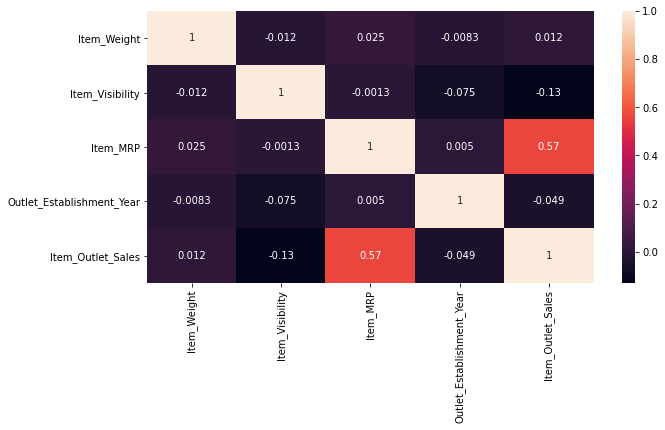

In [10]:
corr=df.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr,annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for k in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    df[k]=le.fit_transform(df[k])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


In [13]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


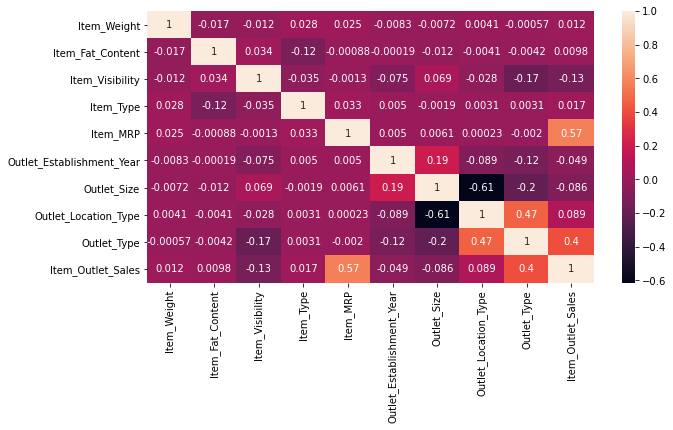

In [14]:
corr=df.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr,annot=True)

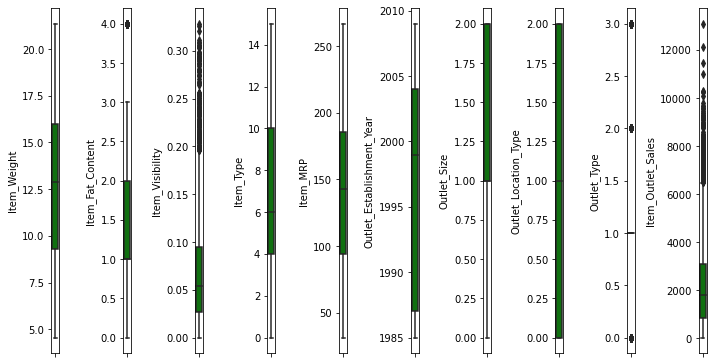

In [15]:
collist=df.columns.values
ncol=50
nrows=20
plt.figure(figsize=(ncol,2*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [16]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [17]:
df1.shape, df.shape

((8222, 10), (8523, 10))

In [18]:
percent_loss=((301)/8523)*100
print(percent_loss)

3.5316203214830457


In [19]:
df1.skew()

Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [20]:
df1['Item_Visibility']=np.log1p(df1['Item_Visibility'])

In [21]:
df1['Outlet_Type']=np.log1p(df1['Outlet_Type'])

In [22]:
x=df1.drop(['Item_Outlet_Sales'],axis=1)
y=df1['Item_Outlet_Sales']

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [25]:
best_rstate=0
accu=0
for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    lg=LinearRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=r2_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 54.66750629940324 found on random_state 198


In [26]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=198)
lg=LinearRegression()
lg.fit(train_x,train_y)
predlg=lg.predict(test_x)
lgscore=cross_val_score(lg, sx, y, cv=5)
print('r2_score', r2_score(test_y,predlg))
print('cv_score', lgscore.mean())
print('MAE:',mean_absolute_error(test_y,predlg))
print('MSE:',mean_squared_error(test_y,predlg))
print('RMSE:',np.sqrt(mean_squared_error(test_y,predlg)))

r2_score 0.5466750629940325
cv_score 0.5176117688455429
MAE: 832.4578154253371
MSE: 1155107.2027321137
RMSE: 1074.7591370777518


In [27]:
rf=RandomForestRegressor()
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)
rfscore=cross_val_score(rf, sx, y, cv=5)
print('r2_score', r2_score(test_y,predrf))
print('cv_score', rfscore.mean())

r2_score 0.5591949796391965
cv_score 0.5333235723939539


In [28]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(train_x,train_y)
predab=ab.predict(test_x)
abscore=cross_val_score(ab, sx, y, cv=5)
print('r2_score', r2_score(test_y,predab))
print('cv_score', abscore.mean())

r2_score 0.5843681297551637
cv_score 0.5503421406407697


In [29]:
parameter={'n_estimators':[50,100,150,200,250],
           'loss':['linear','square','exponential']}

In [30]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(ab,parameter,cv=5,scoring='r2')
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('r2_score', r2_score(test_y,gcv_pred))

r2_score 0.5791559768310914


In [32]:
import pickle
file='bigmart.pkl'
pickle.dump(ab,open(file,'wb'))